In [115]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas_profiling as pp
from pandas_profiling import ProfileReport
from pycaret.classification import *

**Function to read data from CSV file**

In [116]:
def import_csv_data(filepath):
    
    df = pd.read_csv(filepath, 
                          index_col=[0], 
                          parse_dates=['EFFECTIVEDATE','PAIDTODATE','INCEPTIONDATE'], 
                          infer_datetime_format=True)
    
    return df

In [117]:
data = import_csv_data('../data/persistency/training_and_test_data.csv')

data.head()

PRODUCT               OCCUPATION GENDER  \
POLICYNO                                                                 
8868646                   BIMA YA KARO        TEACHER [CLASS 1]      M   
MMP/11887/2018  MADISON MONEY MAX PLUS  ADMINISTRATOR [CLASS 1]      F   
LK3284934            MADISON 2000 PLUS     IT MANAGER [CLASS 1]      M   
MUP/00316/2017         MADISON UNIPLAN        TEACHER [CLASS 1]      F   
HP/23948/2017            HEKIMA POLICY        TEACHER [CLASS 1]      F   

               EFFECTIVEDATE  UNDERWRITINGYEAR  TERM  ANB FREQOFPAYMENT  \
POLICYNO                                                                  
8868646           2015-01-09              2015    15   43             M   
MMP/11887/2018    2018-01-07              2018     8   54             M   
LK3284934         2013-01-02              2013    12   43             M   
MUP/00316/2017    2017-01-08              2017     6   58             M   
HP/23948/2017     2017-01-04              2017    12   44             M   

               PAYMETHOD  SUMASSURED PAIDTODATE  PREMIUM  OSPREM PRODTYPE  \
POLICYNO                                                                    
8868646                K    214592.0 2020-04-30   3000.0  -831.0       ED   
MMP/11887/2018        DD    100265.0 2020-06-30   3000.0 -8000.0       IN   
LK3284934              K    305922.0 2020-04-30   5187.0  -548.0       EN   
MUP/00316/2017         K    385638.0 2020-05-31   5000.0 -5000.0       IN   
HP/23948/2017          K    147015.0 2020-05-31   2000.0 -2821.0       EN   

               INCEPTIONDATE  STATUS  
POLICYNO                              
8868646           2015-01-09  ACTIVE  
MMP/11887/2018    2018-04-05  ACTIVE  
LK3284934         2012-11-23  ACTIVE  
MUP/00316/2017    2017-01-08  ACTIVE  
HP/23948/2017     2017-01-13  ACTIVE

In [118]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 64999 entries, 8868646 to MMP/10683/2018
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   PRODUCT           64999 non-null  object        
 1   OCCUPATION        64999 non-null  object        
 2   GENDER            64999 non-null  object        
 3   EFFECTIVEDATE     64999 non-null  datetime64[ns]
 4   UNDERWRITINGYEAR  64999 non-null  int64         
 5   TERM              64999 non-null  int64         
 6   ANB               64999 non-null  int64         
 7   FREQOFPAYMENT     64999 non-null  object        
 8   PAYMETHOD         64952 non-null  object        
 9   SUMASSURED        64999 non-null  float64       
 10  PAIDTODATE        64935 non-null  datetime64[ns]
 11  PREMIUM           64999 non-null  float64       
 12  OSPREM            64999 non-null  float64       
 13  PRODTYPE          64999 non-null  object        
 14  INCEPTIONDAT

**Summary of the policy statuses before cleanup**

In [119]:
data['STATUS'].value_counts()

ACTIVE          29197
FINAL LAPSED    27250
LAPSED           5619
CANCELLED        1459
SURRENDERED      1028
PAID UP           446
Name: STATUS, dtype: int64

**Function to Clean up Policy Status**

In [120]:

def status_cleanup(policies):  
    frequency = policies['FREQOFPAYMENT']
    premium = policies['PREMIUM'] 
    outstandingBal = policies['OSPREM']
    polStatus = policies['STATUS']
    productType = policies['PRODTYPE']
        
    if polStatus == 'SURRENDERED':
        return polStatus
    elif polStatus == 'CANCELLED':
        return polStatus
    elif polStatus == 'PAID UP':
        return polStatus
    elif polStatus == 'FINAL LAPSED':
        return polStatus
    elif polStatus == 'LAPSED':
        return polStatus
    elif polStatus == 'ACTIVE':
        noOfOutstandingInstalment = outstandingBal/premium
        if frequency == 'M':
            if noOfOutstandingInstalment > 3 and noOfOutstandingInstalment <= 12:
                return 'LAPSED'
            elif noOfOutstandingInstalment > 12:
                if productType == 'IN':
                    return 'LAPSED'
                else:
                    return 'FINAL LAPSED'
            else:
                return polStatus
        elif frequency == 'Q':
            if noOfOutstandingInstalment > 2 and noOfOutstandingInstalment <= 4:
                return 'LAPSED'
            elif noOfOutstandingInstalment > 4:
                if productType == 'IN':
                    return 'LAPSED'
                else:
                    return 'FINAL LAPSED'
            else:
                return polStatus
        elif frequency == 'F':
            if noOfOutstandingInstalment > 1:
                if productType == 'IN':
                    return 'LAPSED'
                else:
                    return 'FINAL LAPSED'
            else:
                return polStatus
        elif frequency == 'S':
            if noOfOutstandingInstalment > 1 and noOfOutstandingInstalment <= 2:
                return 'LAPSED'
            elif noOfOutstandingInstalment > 2:
                if productType == 'IN':
                    return 'LAPSED'
                else:
                    return 'FINAL LAPSED'
            else:
                return polStatus
        elif frequency == 'A':
            if noOfOutstandingInstalment > 1 and noOfOutstandingInstalment <= 2:
                return 'LAPSED'
            elif noOfOutstandingInstalment > 2:
                if productType == 'IN':
                    return 'LAPSED'
                else:
                    return 'FINAL LAPSED'
            else:
                return polStatus
        elif frequency == 'W':
            if noOfOutstandingInstalment > 3 and noOfOutstandingInstalment <= 12:
                return 'LAPSED'
            elif noOfOutstandingInstalment > 12:
                if productType == 'IN':
                    return 'LAPSED'
                else:
                    return 'FINAL LAPSED'
            else:
                return polStatus
        else:
            return polStatus
      
    else:
        return polStatus      
            

**Clean up errorneous policy status**

In [121]:
data['STATUS'] = data.apply(lambda x: status_cleanup(x), axis=1)

**Summary of the policy statuses after cleanup**

In [122]:
data['STATUS'].value_counts()

FINAL LAPSED    27325
ACTIVE          19350
LAPSED          15391
CANCELLED        1459
SURRENDERED      1028
PAID UP           446
Name: STATUS, dtype: int64

**A bar chart depicting policy status distribution**

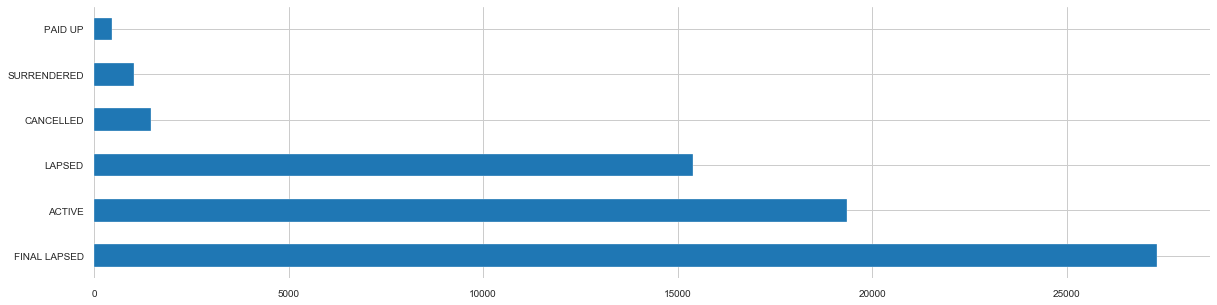

In [123]:
policy = data['STATUS'].value_counts().head(30).plot(kind='barh', figsize=(20,5))

**Using box plot and violin to visualize the relationship between numerical features and the label**

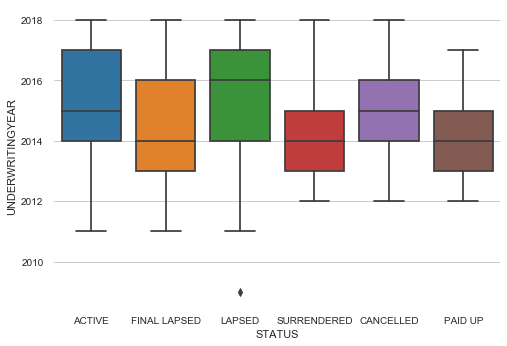

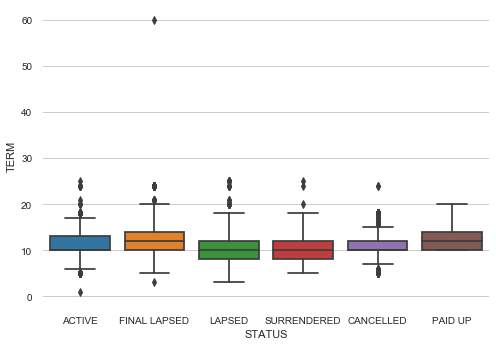

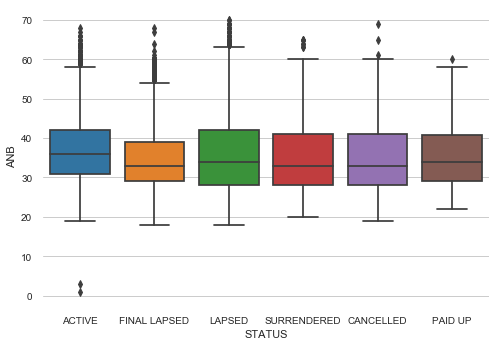

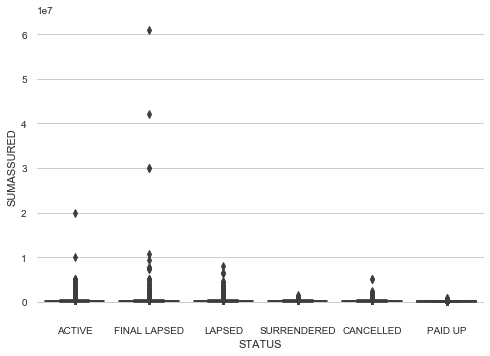

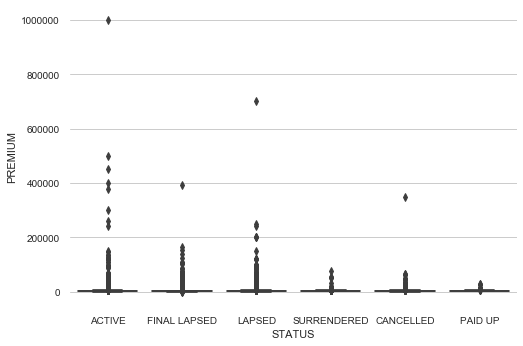

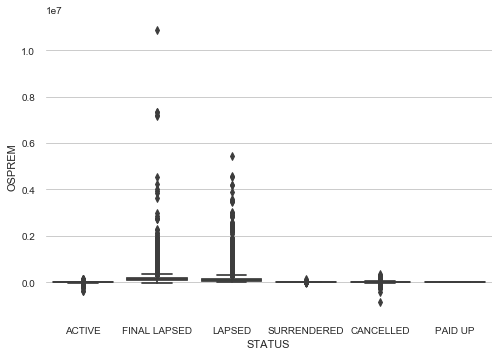

In [124]:
numerical = data.select_dtypes(include='number').columns.to_list()
def plot_box(policies, cols, col_x = 'STATUS'):
    for col in cols:
        sns.set_style("whitegrid")
        sns.boxplot(col_x, col, data=policies)
        plt.xlabel(col_x) # Set text for the x axis
        plt.ylabel(col)# Set text for y axis
        plt.show()

num_cols = numerical
plot_box(data, num_cols)

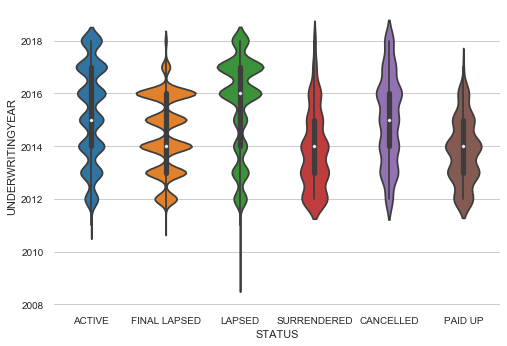

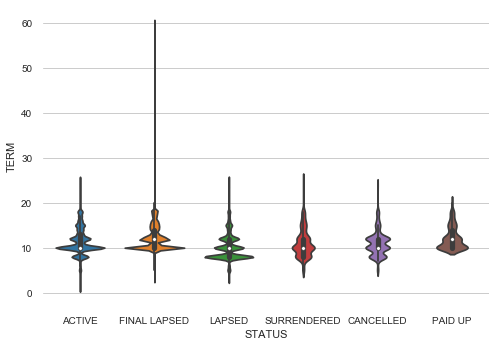

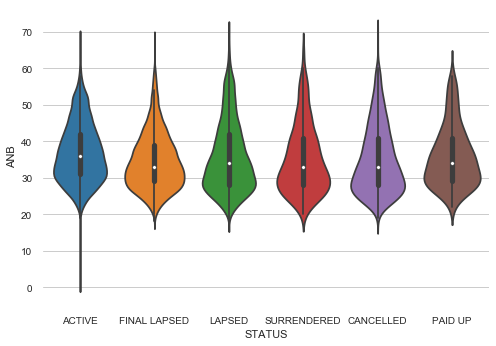

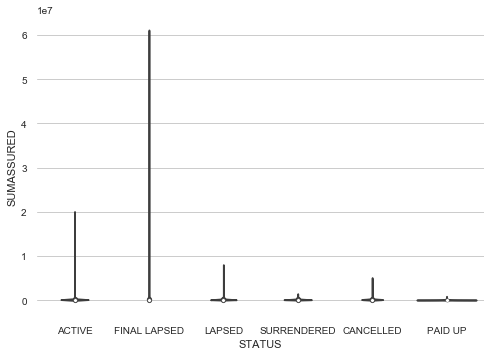

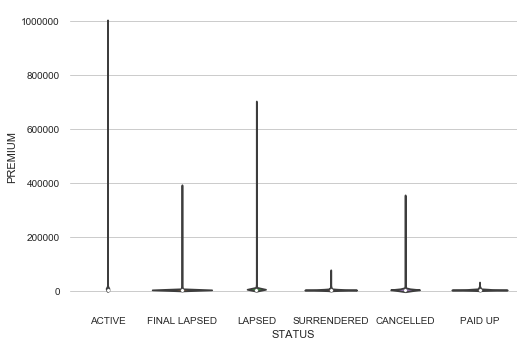

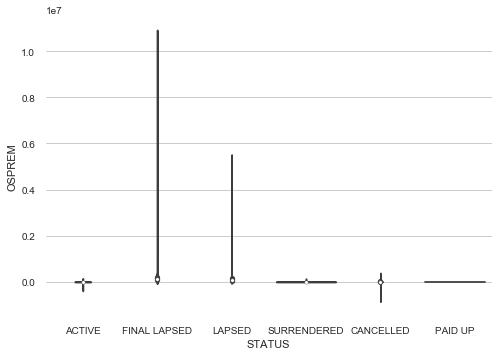

In [125]:
def plot_violin(policies, cols, col_x = 'STATUS'):
    for col in cols:
        sns.set_style("whitegrid")
        sns.violinplot(col_x, col, data=policies)
        plt.xlabel(col_x) # Set text for the x axis
        plt.ylabel(col)# Set text for y axis
        plt.show()
        

plot_violin(data, num_cols)

'STATUS'

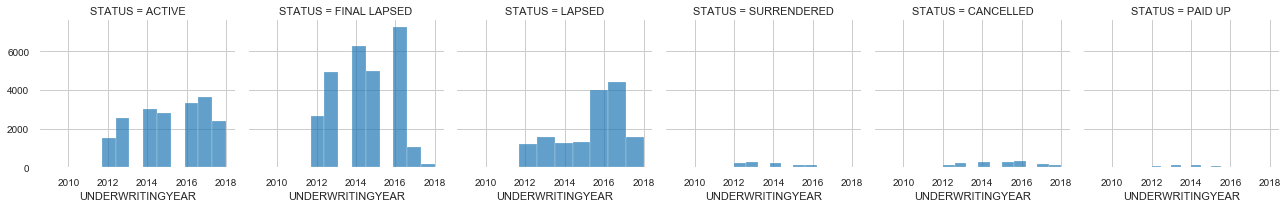

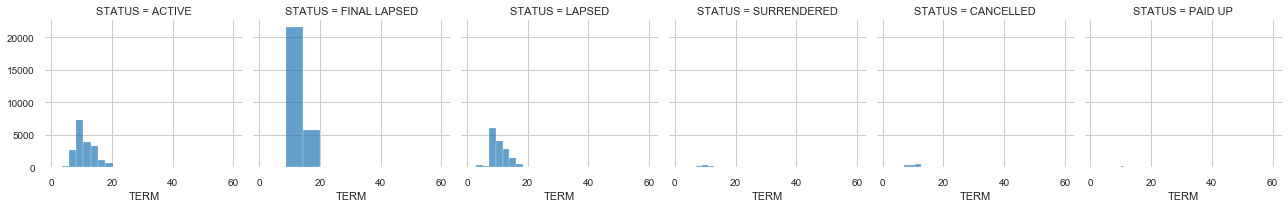

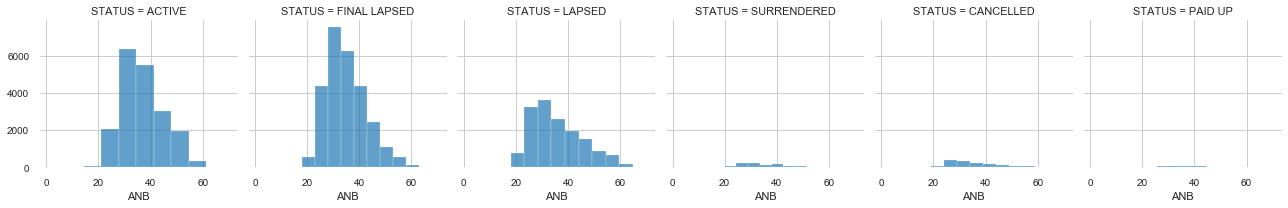

In [126]:
## Function to plot conditioned histograms
def cond_hists(df, plot_cols, grid_col):
    import matplotlib.pyplot as plt
    import seaborn as sns
    ## Loop over the list of columns
    for col in plot_cols:
        grid1 = sns.FacetGrid(df, col=grid_col)
        grid1.map(plt.hist, col, alpha=.7)
    return grid_col

## Define columns for making a conditioned histogram
plot_cols2 = ["UNDERWRITINGYEAR",
               "TERM",
               "ANB"]

cond_hists(data, plot_cols2, 'STATUS')

**Using bar chart to visualize the relationship between categorical features and the label**

PRODUCT


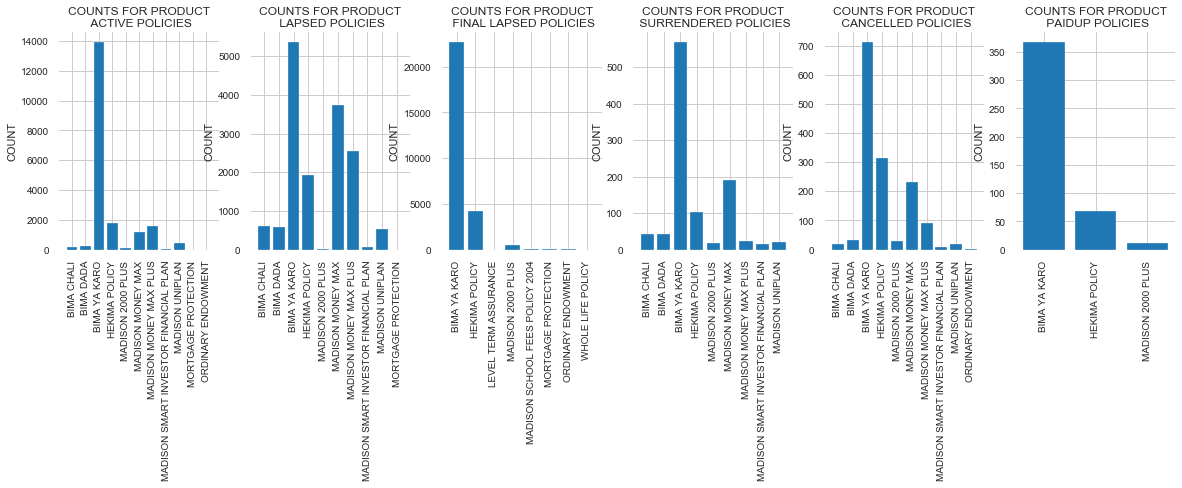

GENDER


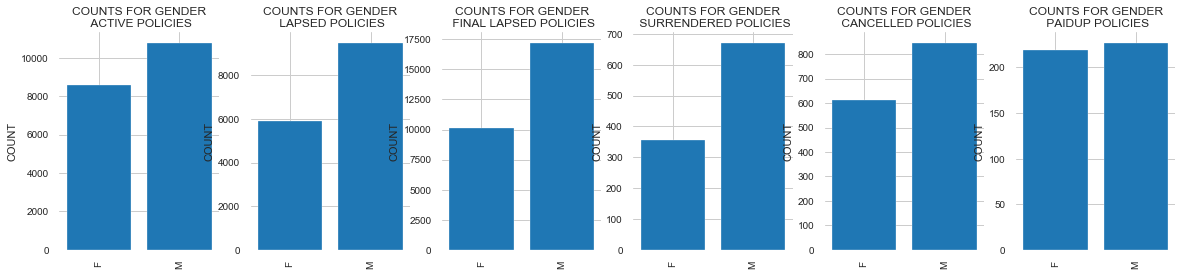

FREQOFPAYMENT


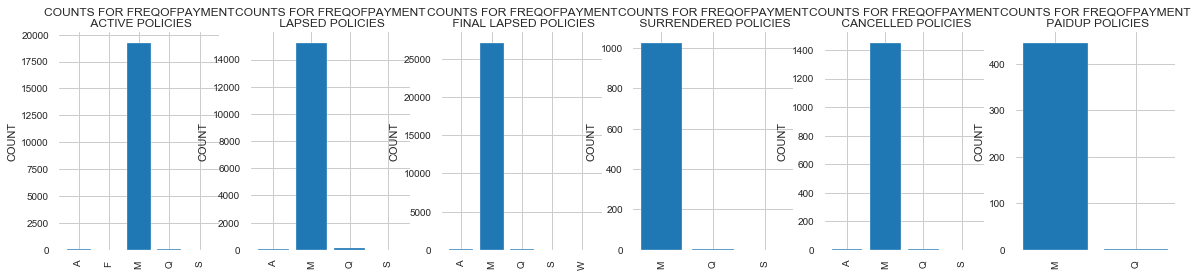

PAYMETHOD


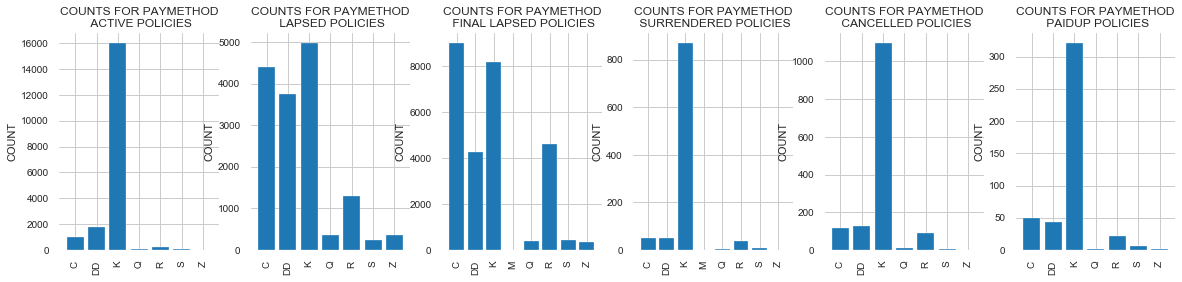

PRODTYPE


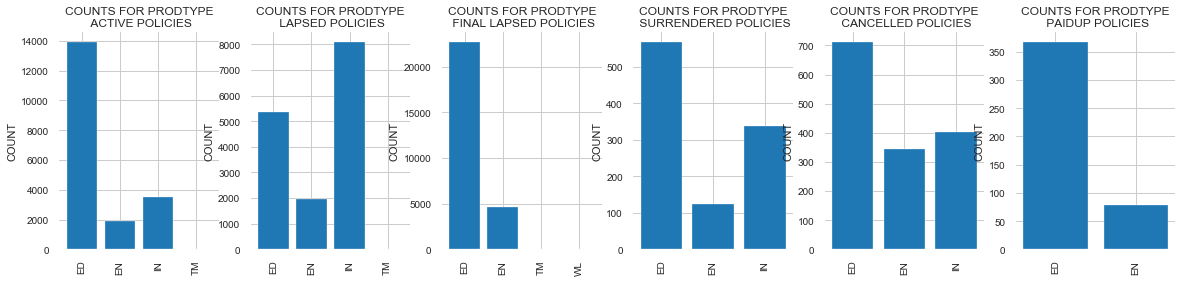

In [127]:
categorical = data.select_dtypes(include='object').columns.to_list()
cat_cols = categorical

data['dummy'] = np.ones(shape = data.shape[0])
for col in cat_cols:
    if col not in ['OCCUPATION','STATUS']: 
        print(col)
        counts = data[['dummy', 'STATUS', col]].groupby(['STATUS', col], as_index = False).count()
        temp = counts[counts['STATUS'] == 'ACTIVE'][[col, 'dummy']]
        _ = plt.figure(figsize = (20,4))
        plt.subplot(1, 6, 1)
        temp = counts[counts['STATUS'] == 'ACTIVE'][[col, 'dummy']]
        plt.bar(temp[col], temp.dummy)
        plt.xticks(rotation=90)
        plt.title('COUNTS FOR ' + col + '\n ACTIVE POLICIES')
        plt.ylabel('COUNT')
        plt.subplot(1, 6, 2)
        temp = counts[counts['STATUS'] == 'LAPSED'][[col, 'dummy']]
        plt.bar(temp[col], temp.dummy)
        plt.xticks(rotation=90)
        plt.title('COUNTS FOR ' + col + '\n LAPSED POLICIES')
        plt.ylabel('COUNT')
        plt.subplot(1, 6, 3)
        temp = counts[counts['STATUS'] == 'FINAL LAPSED'][[col, 'dummy']]
        plt.bar(temp[col], temp.dummy)
        plt.xticks(rotation=90)
        plt.title('COUNTS FOR ' + col + '\n FINAL LAPSED POLICIES')
        plt.ylabel('COUNT')
        plt.subplot(1, 6, 4)
        temp = counts[counts['STATUS'] == 'SURRENDERED'][[col, 'dummy']]
        plt.bar(temp[col], temp.dummy)
        plt.xticks(rotation=90)
        plt.title('COUNTS FOR ' + col + '\n SURRENDERED POLICIES')
        plt.ylabel('COUNT')
        plt.subplot(1, 6, 5)
        temp = counts[counts['STATUS'] == 'CANCELLED'][[col, 'dummy']]
        plt.bar(temp[col], temp.dummy)
        plt.xticks(rotation=90)
        plt.title('COUNTS FOR ' + col + '\n CANCELLED POLICIES')
        plt.ylabel('COUNT')
        plt.subplot(1, 6, 6)
        temp = counts[counts['STATUS'] == 'PAID UP'][[col, 'dummy']]
        plt.bar(temp[col], temp.dummy)
        plt.xticks(rotation=90)
        plt.title('COUNTS FOR ' + col + '\n PAIDUP POLICIES')
        plt.ylabel('COUNT')
        plt.show()

**Data analysis using pandas profiling, shows data correlations, statistical analysis (Mode, Median, Mean, std, var)**

In [128]:
profile = ProfileReport(data)
profile

In [129]:
data.isna()

PRODUCT  OCCUPATION  GENDER  EFFECTIVEDATE  UNDERWRITINGYEAR  \
POLICYNO                                                                       
8868646           False       False   False          False             False   
MMP/11887/2018    False       False   False          False             False   
LK3284934         False       False   False          False             False   
MUP/00316/2017    False       False   False          False             False   
HP/23948/2017     False       False   False          False             False   
...                 ...         ...     ...            ...               ...   
BYK/10614/2018    False       False   False          False             False   
MMP/10681/2018    False       False   False          False             False   
MMP/10680/2018    False       False   False          False             False   
BYK/10613/2018    False       False   False          False             False   
MMP/10683/2018    False       False   False          False             False   

                 TERM    ANB  FREQOFPAYMENT  PAYMETHOD  SUMASSURED  \
POLICYNO                                                             
8868646         False  False          False      False       False   
MMP/11887/2018  False  False          False      False       False   
LK3284934       False  False          False      False       False   
MUP/00316/2017  False  False          False      False       False   
HP/23948/2017   False  False          False      False       False   
...               ...    ...            ...        ...         ...   
BYK/10614/2018  False  False          False      False       False   
MMP/10681/2018  False  False          False      False       False   
MMP/10680/2018  False  False          False      False       False   
BYK/10613/2018  False  False          False      False       False   
MMP/10683/2018  False  False          False      False       False   

                PAIDTODATE  PREMIUM  OSPREM  PRODTYPE  INCEPTIONDATE  STATUS  \
POLICYNO                                                                       
8868646              False    False   False     False          False   False   
MMP/11887/2018       False    False   False     False          False   False   
LK3284934            False    False   False     False          False   False   
MUP/00316/2017       False    False   False     False          False   False   
HP/23948/2017        False    False   False     False          False   False   
...                    ...      ...     ...       ...            ...     ...   
BYK/10614/2018       False    False   False     False          False   False   
MMP/10681/2018       False    False   False     False          False   False   
MMP/10680/2018       False    False   False     False          False   False   
BYK/10613/2018       False    False   False     False          False   False   
MMP/10683/2018       False    False   False     False          False   False   

                dummy  
POLICYNO               
8868646         False  
MMP/11887/2018  False  
LK3284934       False  
MUP/00316/2017  False  
HP/23948/2017   False  
...               ...  
BYK/10614/2018  False  
MMP/10681/2018  False  
MMP/10680/2018  False  
BYK/10613/2018  False  
MMP/10683/2018  False  

[64999 rows x 17 columns]

In [130]:
data.shape

(64999, 17)

In [131]:
data.head()

PRODUCT               OCCUPATION GENDER  \
POLICYNO                                                                 
8868646                   BIMA YA KARO        TEACHER [CLASS 1]      M   
MMP/11887/2018  MADISON MONEY MAX PLUS  ADMINISTRATOR [CLASS 1]      F   
LK3284934            MADISON 2000 PLUS     IT MANAGER [CLASS 1]      M   
MUP/00316/2017         MADISON UNIPLAN        TEACHER [CLASS 1]      F   
HP/23948/2017            HEKIMA POLICY        TEACHER [CLASS 1]      F   

               EFFECTIVEDATE  UNDERWRITINGYEAR  TERM  ANB FREQOFPAYMENT  \
POLICYNO                                                                  
8868646           2015-01-09              2015    15   43             M   
MMP/11887/2018    2018-01-07              2018     8   54             M   
LK3284934         2013-01-02              2013    12   43             M   
MUP/00316/2017    2017-01-08              2017     6   58             M   
HP/23948/2017     2017-01-04              2017    12   44             M   

               PAYMETHOD  SUMASSURED PAIDTODATE  PREMIUM  OSPREM PRODTYPE  \
POLICYNO                                                                    
8868646                K    214592.0 2020-04-30   3000.0  -831.0       ED   
MMP/11887/2018        DD    100265.0 2020-06-30   3000.0 -8000.0       IN   
LK3284934              K    305922.0 2020-04-30   5187.0  -548.0       EN   
MUP/00316/2017         K    385638.0 2020-05-31   5000.0 -5000.0       IN   
HP/23948/2017          K    147015.0 2020-05-31   2000.0 -2821.0       EN   

               INCEPTIONDATE  STATUS  dummy  
POLICYNO                                     
8868646           2015-01-09  ACTIVE    1.0  
MMP/11887/2018    2018-04-05  ACTIVE    1.0  
LK3284934         2012-11-23  ACTIVE    1.0  
MUP/00316/2017    2017-01-08  ACTIVE    1.0  
HP/23948/2017     2017-01-13  ACTIVE    1.0

In [132]:
# creating bool series True for NaN values  
bool_series = pd.isnull(data['ANB'])  
    
# filtering data  
# displaying data only with Gender = NaN  
data[bool_series]  

Empty DataFrame
Columns: [PRODUCT, OCCUPATION, GENDER, EFFECTIVEDATE, UNDERWRITINGYEAR, TERM, ANB, FREQOFPAYMENT, PAYMETHOD, SUMASSURED, PAIDTODATE, PREMIUM, OSPREM, PRODTYPE, INCEPTIONDATE, STATUS, dummy]
Index: []

In [133]:
bool_series.shape

(64999,)

In [134]:
data.shape

(64999, 17)

In [135]:
data.dropna(axis = 0, inplace = True)

In [136]:
data.shape

(64888, 17)

In [137]:
investment = data[(data['PRODTYPE'] == 'IN') & (data['STATUS'] == 'FINAL LAPSED')]
investment.head()

Empty DataFrame
Columns: [PRODUCT, OCCUPATION, GENDER, EFFECTIVEDATE, UNDERWRITINGYEAR, TERM, ANB, FREQOFPAYMENT, PAYMETHOD, SUMASSURED, PAIDTODATE, PREMIUM, OSPREM, PRODTYPE, INCEPTIONDATE, STATUS, dummy]
Index: []

In [138]:
data.drop(['PRODUCT','UNDERWRITINGYEAR','SUMASSURED','OSPREM', 'GENDER','EFFECTIVEDATE', 'PAIDTODATE', 'INCEPTIONDATE','dummy'], axis=1, inplace=True)
#Or
#data.drop(columns=['PRODUCT', 'OCCUPATION','UNDERWRITINGYEAR','SUMASSURED','OSPREM','PREMIUM', 'GENDER','dummy'])
data.head()

OCCUPATION  TERM  ANB FREQOFPAYMENT PAYMETHOD  \
POLICYNO                                                                     
8868646               TEACHER [CLASS 1]    15   43             M         K   
MMP/11887/2018  ADMINISTRATOR [CLASS 1]     8   54             M        DD   
LK3284934          IT MANAGER [CLASS 1]    12   43             M         K   
MUP/00316/2017        TEACHER [CLASS 1]     6   58             M         K   
HP/23948/2017         TEACHER [CLASS 1]    12   44             M         K   

                PREMIUM PRODTYPE  STATUS  
POLICYNO                                  
8868646          3000.0       ED  ACTIVE  
MMP/11887/2018   3000.0       IN  ACTIVE  
LK3284934        5187.0       EN  ACTIVE  
MUP/00316/2017   5000.0       IN  ACTIVE  
HP/23948/2017    2000.0       EN  ACTIVE

In [139]:
X = data.loc[:, :'PRODTYPE']
X

OCCUPATION  TERM  ANB FREQOFPAYMENT PAYMETHOD  \
POLICYNO                                                                     
8868646               TEACHER [CLASS 1]    15   43             M         K   
MMP/11887/2018  ADMINISTRATOR [CLASS 1]     8   54             M        DD   
LK3284934          IT MANAGER [CLASS 1]    12   43             M         K   
MUP/00316/2017        TEACHER [CLASS 1]     6   58             M         K   
HP/23948/2017         TEACHER [CLASS 1]    12   44             M         K   
...                                 ...   ...  ...           ...       ...   
BYK/10614/2018        TEACHER [CLASS 1]    10   30             M         K   
MMP/10681/2018        TEACHER [CLASS 1]     8   27             M        DD   
MMP/10680/2018          NURSE [CLASS 1]     8   30             M         K   
BYK/10613/2018          NURSE [CLASS 1]    12   39             M         K   
MMP/10683/2018        SOLDIER [CLASS 3]     8   25             M         K   

                PREMIUM PRODTYPE  
POLICYNO                          
8868646          3000.0       ED  
MMP/11887/2018   3000.0       IN  
LK3284934        5187.0       EN  
MUP/00316/2017   5000.0       IN  
HP/23948/2017    2000.0       EN  
...                 ...      ...  
BYK/10614/2018   3500.0       ED  
MMP/10681/2018   3000.0       IN  
MMP/10680/2018   5000.0       IN  
BYK/10613/2018   2500.0       ED  
MMP/10683/2018   3000.0       IN  

[64888 rows x 7 columns]

**Model with Categorical and Numerical Features**

In [140]:
numerical_features = X.select_dtypes(include='number').columns.to_list()
numerical_features

['TERM', 'ANB', 'PREMIUM']

In [141]:
categorical_features = X.select_dtypes(include='object').columns.to_list()
categorical_features

['OCCUPATION', 'FREQOFPAYMENT', 'PAYMETHOD', 'PRODTYPE']

In [142]:
date_features = X.select_dtypes(include='datetime64[ns]').columns.to_list()
date_features

[]

**Compare model with pycaret, to know the best model to use for this classification problem**

In [143]:
clf1 = setup(data = data, 
             target = 'STATUS',
             numeric_imputation = 'mean',
             categorical_imputation='mode',
             categorical_features = categorical_features)


 
Setup Succesfully Completed!


In [144]:
compare_models()

In [145]:
catboost = create_model('catboost')

Accuracy  AUC  Recall   Prec.      F1   Kappa
0       0.6529  0.0  0.3421  0.6531  0.6352  0.4694
1       0.6462  0.0  0.3297  0.6374  0.6291  0.4594
2       0.6504  0.0  0.3445  0.6446  0.6341  0.4654
3       0.6502  0.0  0.3441  0.6510  0.6335  0.4640
4       0.6491  0.0  0.3370  0.6541  0.6328  0.4629
5       0.6504  0.0  0.3389  0.6451  0.6332  0.4649
6       0.6491  0.0  0.3459  0.6520  0.6348  0.4653
7       0.6497  0.0  0.3369  0.6464  0.6332  0.4649
8       0.6537  0.0  0.3384  0.6456  0.6365  0.4708
9       0.6658  0.0  0.3439  0.6722  0.6486  0.4896
Mean    0.6517  0.0  0.3401  0.6502  0.6351  0.4677
SD      0.0051  0.0  0.0047  0.0088  0.0049  0.0079

In [146]:
lineardisc = create_model('lda')

Accuracy  AUC  Recall   Prec.      F1   Kappa
0       0.6282  0.0  0.3401  0.6201  0.6187  0.4387
1       0.6295  0.0  0.3403  0.6263  0.6216  0.4411
2       0.6266  0.0  0.3461  0.6232  0.6180  0.4356
3       0.6297  0.0  0.3519  0.6240  0.6212  0.4403
4       0.6268  0.0  0.3496  0.6220  0.6185  0.4357
5       0.6277  0.0  0.3420  0.6192  0.6181  0.4367
6       0.6284  0.0  0.3442  0.6275  0.6225  0.4413
7       0.6286  0.0  0.3315  0.6205  0.6189  0.4382
8       0.6290  0.0  0.3331  0.6202  0.6199  0.4397
9       0.6444  0.0  0.3362  0.6367  0.6348  0.4625
Mean    0.6299  0.0  0.3415  0.6240  0.6212  0.4410
SD      0.0049  0.0  0.0064  0.0050  0.0048  0.0074

In [ ]:
#bender = blend_models(estimator_list=[catboost, lineardisc])

**Best model is CatBoost Classifier**

In [148]:
tuned_catboost = tune_model('catboost')

Accuracy  AUC  Recall   Prec.      F1   Kappa
0       0.6520  0.0  0.3410  0.6514  0.6339  0.4682
1       0.6460  0.0  0.3300  0.6379  0.6291  0.4593
2       0.6535  0.0  0.3426  0.6468  0.6364  0.4700
3       0.6497  0.0  0.3520  0.6511  0.6336  0.4635
4       0.6480  0.0  0.3438  0.6531  0.6326  0.4620
5       0.6532  0.0  0.3408  0.6476  0.6364  0.4697
6       0.6491  0.0  0.3477  0.6467  0.6355  0.4660
7       0.6491  0.0  0.3369  0.6457  0.6327  0.4641
8       0.6546  0.0  0.3402  0.6478  0.6379  0.4723
9       0.6612  0.0  0.3410  0.6587  0.6439  0.4825
Mean    0.6516  0.0  0.3416  0.6487  0.6352  0.4678
SD      0.0041  0.0  0.0056  0.0052  0.0037  0.0062

In [ ]:
#"../pickle/policy_persistency

In [150]:
data_to_predict = import_csv_data('../data/persistency/active_policies.csv')

data_to_predict.head()

PRODUCT                         OCCUPATION  \
POLICYNO                                                                    
BMC4706113                  BIMA CHALI  LABORATORY TECHNOLOGIST [CLASS 2]   
LS3254211   MADISON SCHOOL FEES POLICY                  TEACHER [CLASS 1]   
LR3254850            WHOLE LIFE POLICY            CIVIL SERVANT [CLASS 1]   
LD3252812          MORTGAGE PROTECTION            ADMINISTRATOR [CLASS 1]   
LD3254639            WHOLE LIFE POLICY          CUSTOMS OFFICER [CLASS 1]   

           GENDER EFFECTIVEDATE  UNDERWRITINGYEAR  TERM   ANB FREQOFPAYMENT  \
POLICYNO                                                                      
BMC4706113      M    2011-01-06              2011     8  35.0             M   
LS3254211       F    2001-01-02              2001    18  35.0             M   
LR3254850       M    2001-01-06              2001    10  47.0             M   
LD3252812       F    2001-01-03              2001    10  47.0             A   
LD3254639       M    2001-01-05              2001    10  33.0             M   

           PAYMETHOD  SUMASSURED PAIDTODATE  PREMIUM    OSPREM PRODTYPE  \
POLICYNO                                                                  
BMC4706113         R     74213.0 2011-10-31   3000.0  273000.0       IN   
LS3254211          K     71700.0 2019-01-31    840.0       0.0       ED   
LR3254850          K     68700.0 2011-07-31    652.0       0.0       WL   
LD3252812          C   1300000.0 2018-02-28   7644.0       0.0       TM   
LD3254639          K    120300.0 2011-06-30    800.0       0.0       WL   

           INCEPTIONDATE  
POLICYNO                  
BMC4706113    2011-04-27  
LS3254211     2001-02-01  
LR3254850     2001-06-01  
LD3252812     2001-03-01  
LD3254639     2001-05-01

In [151]:
data_to_predict.drop(['PRODUCT','UNDERWRITINGYEAR','SUMASSURED','OSPREM', 'GENDER','EFFECTIVEDATE', 'PAIDTODATE', 'INCEPTIONDATE'], axis=1, inplace=True)
#Or
#data_to_predict.drop(columns=['PRODUCT', 'OCCUPATION','UNDERWRITINGYEAR','SUMASSURED','OSPREM','PREMIUM'])
data_to_predict.head()

OCCUPATION  TERM   ANB FREQOFPAYMENT  \
POLICYNO                                                                  
BMC4706113  LABORATORY TECHNOLOGIST [CLASS 2]     8  35.0             M   
LS3254211                   TEACHER [CLASS 1]    18  35.0             M   
LR3254850             CIVIL SERVANT [CLASS 1]    10  47.0             M   
LD3252812             ADMINISTRATOR [CLASS 1]    10  47.0             A   
LD3254639           CUSTOMS OFFICER [CLASS 1]    10  33.0             M   

           PAYMETHOD  PREMIUM PRODTYPE  
POLICYNO                                
BMC4706113         R   3000.0       IN  
LS3254211          K    840.0       ED  
LR3254850          K    652.0       WL  
LD3252812          C   7644.0       TM  
LD3254639          K    800.0       WL

In [152]:
pred = predict_model(tuned_catboost,data = data_to_predict)

In [153]:
type(pred)

pandas.core.frame.DataFrame

In [154]:
date = pd.Timestamp.now().strftime(format='%Y-%m-%d_%H-%M_')
pred.to_csv(f'../predictions/{date}predicted_policy_status.csv', 
                   index=True, header=True)

**Save model (pipeline) for later use in future prediction, as a pickle file.**
Python flask can be used to come up with a web page using GET and POST requests, and be used as an endpoint.

In [155]:
save_model(tuned_catboost, '../pickle/policy_persistency_saved_25092020')

Transformation Pipeline and Model Succesfully Saved
